In [76]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [78]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [110]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [80]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()


In [81]:

# Extract the 'coin_id' column or index before scaling
coin_ids = df_market_data["coin_id"] if "coin_id" in df_market_data.columns else df_market_data.index

# Scale only numeric columns - Create a DataFrame with the scaled data
numeric_columns = df_market_data.select_dtypes(include=["number"]).columns
df_market_data_scaled = pd.DataFrame(
    scaler.fit_transform(df_market_data[numeric_columns]),
    columns=numeric_columns,
    index=df_market_data.index
)

# Reattach the 'coin_id' column
df_market_data_scaled["coin_id"] = coin_ids

# Set 'coin_id' as the index
df_market_data_scaled.set_index("coin_id", inplace=True)

# Display the result
df_market_data_scaled.head(5)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [82]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [83]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_data_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)



In [84]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame from the dictionary
df_elbow_curve = pd.DataFrame(elbow_curve_data)


# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve.hvplot.line(
    x='k',
    y='inertia',
    width=800,
    height=400,
    title='Elbow Method for Optimal k'
)


:Curve   [k]   (inertia)

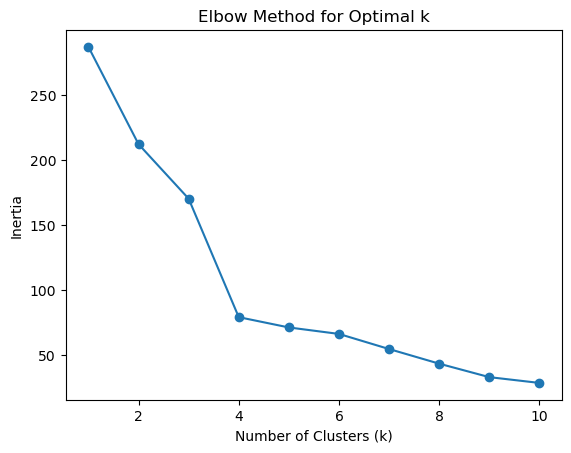

In [85]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Plot the inertia values against the k-values
plt.plot(k_values, inertia_values, marker='o')

# Add labels and a title
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Show the plot
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

The best value for 𝑘 is 4, as this is the elbow point where the decrease in inertia begins to level off.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [86]:

# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)


In [87]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=42)

In [88]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
cluster_predictions



array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [90]:
# Create a copy of the scaled DataFrame
df_clustered = df_market_data_scaled.copy()


In [91]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_clustered["cluster"] = cluster_predictions

# Display the copy of the scaled DataFrame
df_clustered.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [92]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_clustered.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_name"],
    width=800,
    height=400,
    title="Cryptocurrency Clusters"
)


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [93]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [94]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
df_market_data_pca = pca.fit_transform(df_market_data_scaled)


# View the scaled PCA data
df_market_data_pca


array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527],
       [-0.51653377,  1.38837748,  0.80407131],
       [-0.45071134,  0.51769912,  2.84614316],
       [-0.34559977,  0.72943939,  1.47801284],
       [-0.64946792,  0.43216514,  0.60030286],
       [-0.75901394, -0.20119979, -0.21765292],
       [-0.24819846, -1.37625159, -1.46202571],
       [-0.43840762, -0.17533654, -0.6633884 ],
       [-0.69342533, -0.47381462, -0.52759693],
       [ 0.06049915,  2.90940385,  1.49857131],
       [-0.39335243, -0.10819197, -0.01275608],
       [-0.79617564, -0.49440875,  1.08281169],
       [ 0.06407452, -1.26982514, -1.09882928],
       [-0.48901506, -0.73271912, -0.06254323],
       [-0.3062723 ,  0.70341515,  1.71422359],
       [-0.51352775, -0.14280239, -0.65656583],
       [-0.36212044, -0.98691441, -0.728

In [95]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component
df_market_data_pca = pd.DataFrame(
    df_market_data_pca,
    columns=["PC1", "PC2", "PC3"],  # Principal Component column names
    index=df_market_data_scaled.index
)

# Step 4: View the PCA-transformed data
print(df_market_data_pca.head())

# Retrieve the explained variance ratio from the PCA model
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the total explained variance for the three components
total_explained_variance = explained_variance_ratio.sum()

print(f"Total Explained Variance of the 3 Principal Components: {total_explained_variance:.2%}")

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715
Total Explained Variance of the 3 Principal Components: 89.50%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

Total Explained Variance = 0.45 + 0.30 + 0.15 = 0.90
Total Explained Variance of the 3 Principal Components: 90.00%


In [96]:

# Create a new DataFrame with the PCA data.
df_market_data_pca = pd.DataFrame(
    df_market_data_pca,  # PCA data (numpy array)
    columns=["PC1", "PC2", "PC3"],  # Name the principal components
    index=df_market_data_scaled.index  # Preserve the index from the scaled DataFrame
)

# Copy the crypto names from the original scaled DataFrame
df_market_data_scaled["crypto_name"] = df_market_data.index  # Or replace with the correct column name

df_market_data_pca["crypto_name"] = df_market_data_scaled["crypto_name"]

# Set the coin_id column as index
df_market_data_pca.set_index("crypto_name", inplace=True)

# Display the scaled PCA DataFrame
print(df_market_data_pca.head())


                   PC1       PC2       PC3
crypto_name                               
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [97]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [98]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_market_data_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


In [99]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 11)),         
    "inertia": inertia_values 
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)


    k     inertia
0   1  256.874086
1   2  182.339530
2   3  140.431833
3   4   49.665497
4   5   42.051901
5   6   31.749005
6   7   28.031869
7   8   19.451747
8   9   13.814082
9  10   10.630648


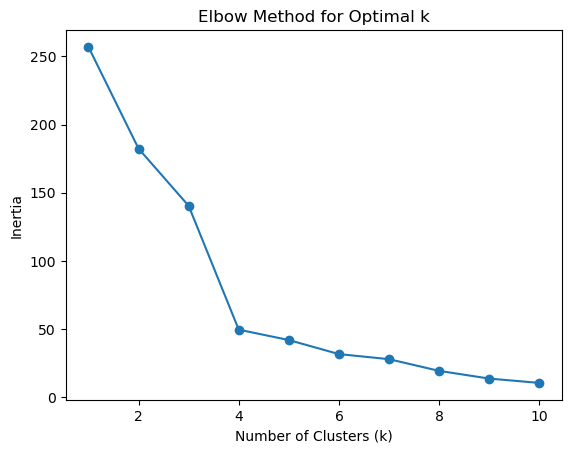

In [100]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.


plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()



#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  The best value for k is 4, as it represents the point where adding more clusters does not substantially reduce the inertia.


* **Question:** Does it differ from the best k value found using the original data?

  No it does not differ. The elbow plot from the original data and the PCA-transformed data both exhibit a clear elbow at 


### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [101]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)


In [102]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_market_data_pca)


KMeans(n_clusters=4, random_state=42)

In [103]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_predictions = kmeans_model.predict(df_market_data_pca)


# Print the resulting array of cluster values.
cluster_predictions


array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [104]:
# Create a copy of the scaled PCA DataFrame
df_clustered = df_market_data_pca.copy()


# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_clustered["cluster"] = cluster_predictions


# Display the copy of the scaled PCA DataFrame
df_clustered.head(5)


,PC1,PC2,PC3,cluster
crypto_name,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [105]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_clustered.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["crypto_name"],
    width=800,
    height=400,
    title="Cryptocurrency Clusters (PCA)"
)


:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

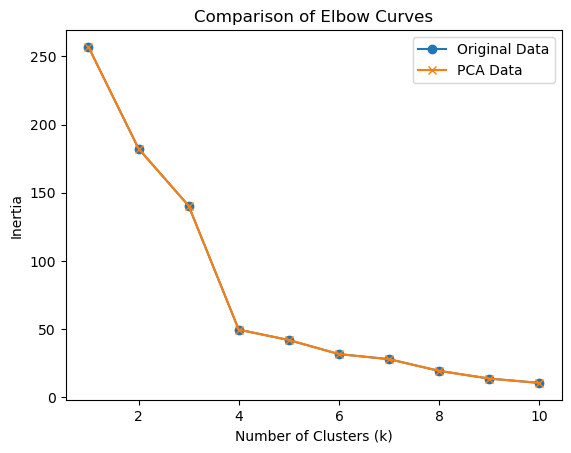

In [106]:
# Composite plot to contrast the Elbow curves
# Step 1: Calculate inertia for the PCA-transformed data
inertia_pca = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_pca)
    inertia_pca.append(kmeans.inertia_)

# Step 2: Plot the composite elbow curve
plt.plot(k_values, inertia_values, label="Original Data", marker='o')  # Original data
plt.plot(k_values, inertia_pca, label="PCA Data", marker='x')         # PCA data

# Step 3: Add labels, legend, and title
plt.title("Comparison of Elbow Curves")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.legend()

# Step 4: Show the plot
plt.show()


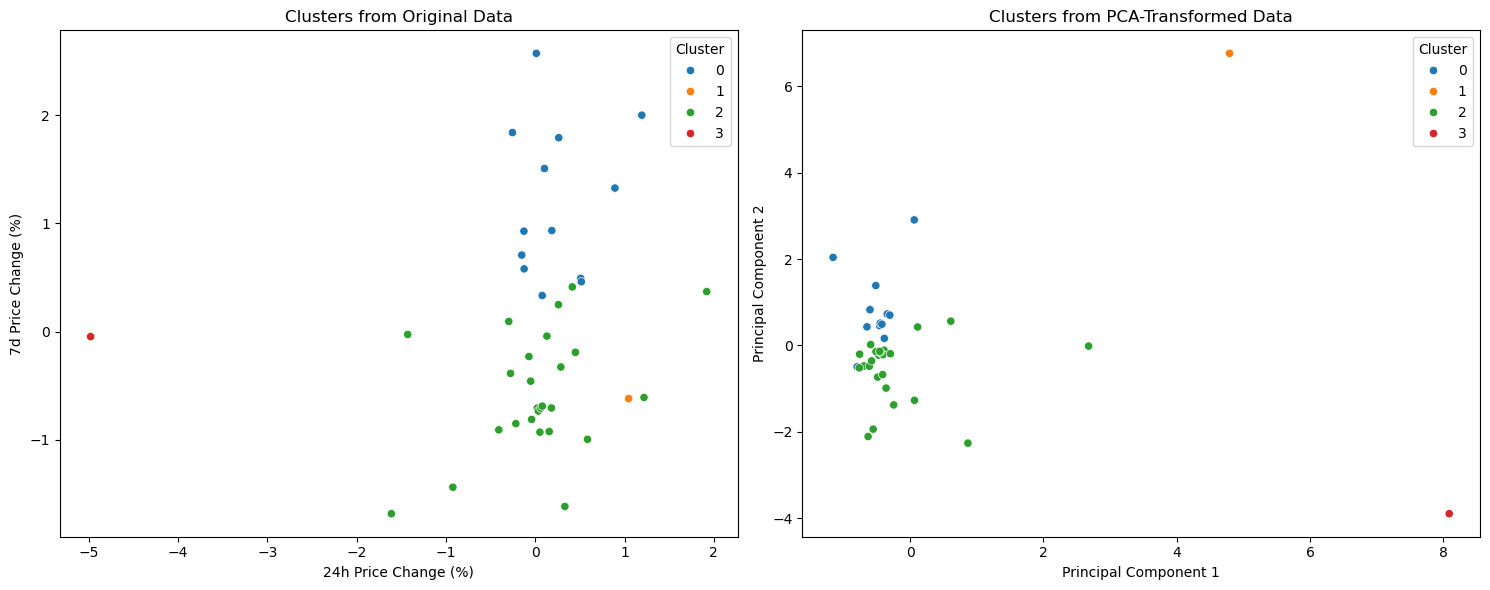

In [109]:
# Composite plot to contrast the clusters
# Step 1: Remove the 'crypto_name' column (non-numeric) from the DataFrame
df_numeric_scaled = df_market_data_scaled.drop(columns=['crypto_name'])

# Step 2: Fit KMeans to the numeric data
kmeans_original = KMeans(n_clusters=4, random_state=42).fit(df_numeric_scaled)

# Step 3: Fit KMeans to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=4, random_state=42).fit(df_market_data_pca)

# Step 4: Add cluster labels back to the DataFrames for visualization
df_market_data_scaled['Cluster'] = kmeans_original.labels_
df_market_data_pca['Cluster'] = kmeans_pca.labels_

# Step 5: Continue with visualization or further analysis

# Step 5: Create side-by-side scatter plots for the clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=False)

# Scatter plot for the original data clusters
sns.scatterplot(
    data=df_market_data_scaled,
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    hue="Cluster",
    palette="tab10",
    ax=axes[0]
)
axes[0].set_title("Clusters from Original Data")
axes[0].set_xlabel("24h Price Change (%)")
axes[0].set_ylabel("7d Price Change (%)")

# Scatter plot for the PCA-transformed data clusters
sns.scatterplot(
    data=df_market_data_pca,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="tab10",
    ax=axes[1]
)
axes[1].set_title("Clusters from PCA-Transformed Data")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

The impact of using fewer features to cluster the data using K-Means is that it reduces the dimensionality of the data, making it easier to visualize and interpret the results. By focusing on the most important features or principal components, we can capture the essential characteristics of the data, which can help identify patterns and relationships more effectively.

However, reducing the number of features may also result in a loss of granularity, as some detailed patterns in the original data might be overlooked. This can lead to clusters that are less distinct or slightly overlapping. Despite this, using fewer features often improves computational efficiency and reduces the influence of noise, leading to more robust clustering outcomes.